In [1]:
# Import our dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

# Creating Initial Dataframe

In [2]:
# Import our csv file

file = "Resources/mba_decision_dataset.csv"
decision_df = pd.read_csv(file)
decision_df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [3]:
# Convert "Yes" to 1 and "No" to 0

decision_df['Has Management Experience'] = decision_df['Has Management Experience'].replace({'Yes': 1, 'No': 0})
decision_df['Decided to Pursue MBA?'] = decision_df['Decided to Pursue MBA?'].replace({'Yes': 1, 'No': 0})

In [4]:
# Remove the "Person ID" column

decision_df.drop(columns=['Person ID'], inplace = True)

decision_df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,8,Entrepreneur,90624,0,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,1
1,24,Male,Arts,3.03,4,Analyst,53576,1,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,0
2,33,Female,Business,3.66,9,Engineer,79796,0,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,0
3,31,Male,Engineering,2.46,1,Manager,105956,0,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,0
4,28,Female,Business,2.75,9,Entrepreneur,96132,0,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,1


# Creating School Dataframe

In [5]:
# Create a Dataframe based solely on school factors
school_df = decision_df[["Age","Gender","Undergraduate Major","Undergraduate GPA","Current Job Title","GRE/GMAT Score","Undergrad University Ranking","MBA Funding Source","Reason for MBA", "Online vs. On-Campus MBA","Decided to Pursue MBA?"]]
school_df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Current Job Title,GRE/GMAT Score,Undergrad University Ranking,MBA Funding Source,Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,Entrepreneur,688,185,Loan,Entrepreneurship,On-Campus,1
1,24,Male,Arts,3.03,Analyst,791,405,Loan,Career Growth,Online,0
2,33,Female,Business,3.66,Engineer,430,107,Scholarship,Skill Enhancement,Online,0
3,31,Male,Engineering,2.46,Manager,356,257,Loan,Entrepreneurship,On-Campus,0
4,28,Female,Business,2.75,Entrepreneur,472,338,Loan,Skill Enhancement,Online,1


# Analysis 1 -  Undergraduate Major vs Pursuing MBA

In [6]:
# Filtered "school_df" according to "Decided to Pursue MBA? = 1"
undergraduate_only_yes = school_df.loc[school_df["Decided to Pursue MBA?"] == 1]
undergraduate_only_yes

,Age,Gender,Undergraduate Major,Undergraduate GPA,Current Job Title,GRE/GMAT Score,Undergrad University Ranking,MBA Funding Source,Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,Entrepreneur,688,185,Loan,Entrepreneurship,On-Campus,1
4,28,Female,Business,2.75,Entrepreneur,472,338,Loan,Skill Enhancement,Online,1
7,27,Male,Engineering,2.80,Engineer,588,190,Loan,Entrepreneurship,On-Campus,1
8,30,Female,Arts,2.06,Entrepreneur,521,455,Scholarship,Career Growth,On-Campus,1
9,23,Female,Arts,3.51,Entrepreneur,671,411,Scholarship,Entrepreneurship,Online,1
...,...,...,...,...,...,...,...,...,...,...,...
9993,25,Male,Arts,3.40,Entrepreneur,311,233,Employer,Skill Enhancement,Online,1
9994,23,Male,Business,3.28,Entrepreneur,256,190,Self-funded,Networking,Online,1
9995,33,Female,Economics,3.55,Analyst,524,100,Loan,Networking,Online,1
9997,31,Female,Economics,2.86,Manager,681,308,Loan,Networking,On-Campus,1


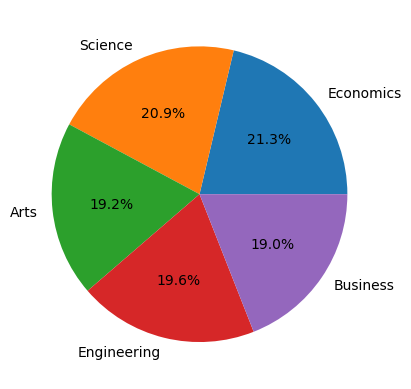

In [7]:
# Distribution of Undergraduate Major (Only "Yes")

only_yes_dist = undergraduate_only_yes["Undergraduate Major"].value_counts()

labels = ["Economics", "Science", "Arts", "Engineering", "Business" ]

sizes = [only_yes_dist["Economics"], only_yes_dist["Science"], only_yes_dist["Arts"], only_yes_dist["Engineering"], only_yes_dist["Business"] ]
plt.pie(sizes, labels = labels, autopct="%1.1f%%")
plt.show()

**Report 1**
<br />
In our Analysis of the affect Undergraduate Major has on the liklihood of pursuing an MBA, the percentage values were as follows: <br />
<br />
Business: 19.0% <br />
Arts: 19.2% <br />
Engineering: 19.6% <br />
Science: 20.9% <br />
Economics: 21.3% <br />
<br />
This analysis showed that Undergraduate Major was not a deciding factor since all study fields were almost equally likely to pursue an MBA.
<br />
This test was inconclusive.

# Analysis 2 - University Ranking vs Pursuing MBA

In [8]:
# Find maximum value of University ranking
school_df["Undergrad University Ranking"].max()

499

C:\Users\batuh\AppData\Local\Temp\ipykernel_34060\2027945337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_df["Ranking Category"] = pd.cut(school_df["Undergrad University Ranking"], bins=bins, labels=labels)


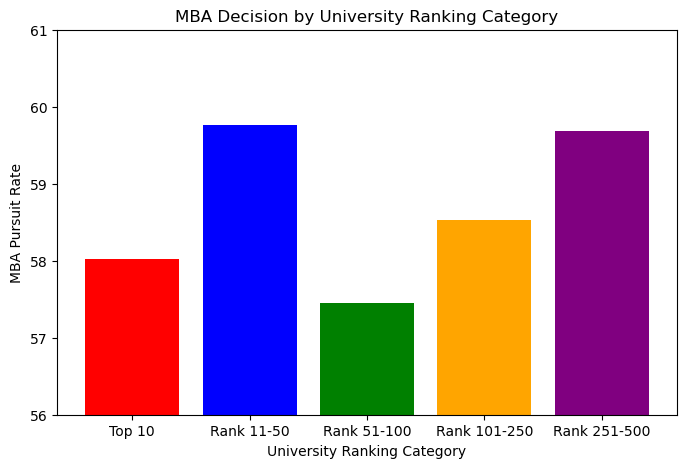

In [9]:
# Create a new category column as "Ranking Category"
bins = [0, 10, 50, 100, 250, 500]
labels = ["Top 10", "Rank 11-50", "Rank 51-100", "Rank 101-250", "Rank 251-500"]

school_df["Ranking Category"] = pd.cut(school_df["Undergrad University Ranking"], bins=bins, labels=labels)

# Calculate the MBA completion rates by groups
mba_by_ranking = school_df.groupby("Ranking Category")["Decided to Pursue MBA?"].count()
mba_by_ranking_only_yes = school_df.loc[school_df["Decided to Pursue MBA?"] == 1].groupby("Ranking Category")["Decided to Pursue MBA?"].count()
ratio = mba_by_ranking_only_yes / mba_by_ranking * 100 

# Display the results
plt.figure(figsize=(8,5))
bar_colors = ["red", "blue", "green", "orange", "purple"]
plt.bar(ratio.index,ratio.values, color = bar_colors )
plt.xlabel("University Ranking Category")
plt.ylabel("MBA Pursuit Rate")
plt.title("MBA Decision by University Ranking Category")
plt.ylim(56,61)
plt.show()


**Logistic Regression Analysis - University Ranking vs Pursuing MBA**

In [10]:
# Independent variable: University rankings
X = school_df[["Undergrad University Ranking"]]
X = sm.add_constant(X)  # Add constant value

# Dependent variable: Decision to pursue an MBA (Binary: 0 or 1)
y = school_df["Decided to Pursue MBA?"]

# Logistic Regression Model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.676589
         Iterations 4
                             Logit Regression Results                             
Dep. Variable:     Decided to Pursue MBA?   No. Observations:                10000
Model:                              Logit   Df Residuals:                     9998
Method:                               MLE   Df Model:                            1
Date:                    Tue, 11 Feb 2025   Pseudo R-squ.:               1.998e-05
Time:                            20:03:46   Log-Likelihood:                -6765.9
converged:                           True   LL-Null:                       -6766.0
Covariance Type:                nonrobust   LLR p-value:                    0.6031
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3488 

**Report 2**
<br />
In our Logistic Regression Analysis of the affect University Ranking has on the liklihood of pursuing an MBA, the key parameters were as follows: <br />
<br />
The model is not statistically significant overall (**LLR p-value: 0.603 > 0.05**). <br />
The variable **"Undergrad University Ranking"** has no significant effect on the MBA decision (**p = 0.603**). <br />
The **Pseudo R² value is very low**, indicating that the independent variables are insufficient to explain the MBA decision. <br />

<br />
This analysis showed that The model is not a good predictor of the MBA decision, and the "Undergrad University Ranking" variable has no significant effect.
<br />
This test was inconclusive.

# Analysis 3 - Undergraduate GPA vs Pursuing MBA 

In [11]:
# Find maximum value of Undergraduate GPA
school_df["Undergraduate GPA"].max()

4.0

In [12]:
# Divide GPA into categories
bins = [0, 2.5, 3.2, 3.7, 4.0]
labels = ["Low", "Medium", "High", "Very High"]
school_df["GPA Category"] = pd.cut(school_df["Undergraduate GPA"], bins=bins, labels=labels)


C:\Users\batuh\AppData\Local\Temp\ipykernel_34060\1972618766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_df["GPA Category"] = pd.cut(school_df["Undergraduate GPA"], bins=bins, labels=labels)


In [13]:
# Calculate the percentage of MBA students in each GPA category
gpa_mba_ratio = school_df.groupby("GPA Category")["Decided to Pursue MBA?"].mean()

# Display the results
print(gpa_mba_ratio)


GPA Category
Low          0.593566
Medium       0.599943
High         0.572945
Very High    0.594556
Name: Decided to Pursue MBA?, dtype: float64


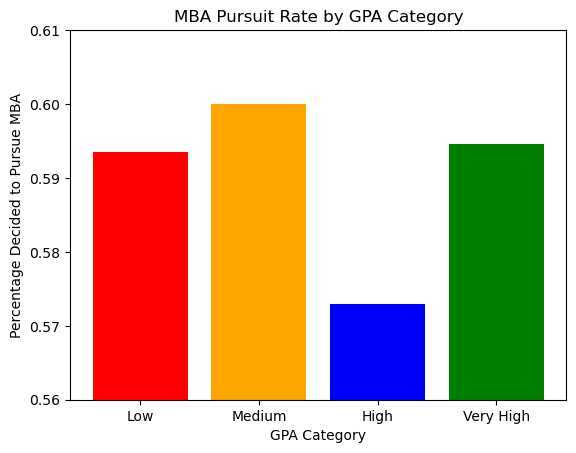

In [14]:
# Draw a bar chart
plt.bar(gpa_mba_ratio.index, gpa_mba_ratio.values, color=["red", "orange", "blue", "green"])

# Chart title and labels
plt.title("MBA Pursuit Rate by GPA Category")
plt.xlabel("GPA Category")
plt.ylabel("Percentage Decided to Pursue MBA")
plt.ylim(0.56, 0.61)
plt.show()


**Report 3**
<br />
In our Analysis of the affect Undergraduate GPA has on the liklihood of pursuing an MBA, the percentage values were as follows: <br />
<br />
Low: 59.4% <br />
Medium: 60.0% <br />
High: 57.3% <br />
Very High: 59.5% <br />
<br />
This analysis showed that Undergraduate GPA was not a deciding factor since all GPA categories were almost equally likely to pursue an MBA.
<br />
This test was inconclusive.

# Analysis 4 - Funding Source vs Pursuing MBA

In [15]:
# Calculate the percentage of MBA students in each Funding Source category
mba_funding_analysis = school_df.groupby("MBA Funding Source")["Decided to Pursue MBA?"].mean().sort_values()
print(mba_funding_analysis)


MBA Funding Source
Scholarship    0.583766
Self-funded    0.585185
Employer       0.592199
Loan           0.601343
Name: Decided to Pursue MBA?, dtype: float64


**ANOVA Test - Funding Source vs Pursuing MBA**

In [16]:
# Grouping by funding categories
funding_groups = [group["Decided to Pursue MBA?"] for _, group in school_df.groupby("MBA Funding Source")]

# ANOVA test
f_stat, p_value = st.f_oneway(*funding_groups)

#Display the results
print(f"ANOVA Test F-Statistic: {f_stat:.4f}")
print(f"ANOVA Test P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference between Funding source and decision to pursue MBA.")
else:
    print("There is no significant difference between Funding source and decision to pursue MBA.")

ANOVA Test F-Statistic: 0.6707
ANOVA Test P-Value: 0.5699
There is no significant difference between Funding source and decision to pursue MBA.


#  Multivariable Logistic Regression Analysis: Factors Influencing Pursuing MBA



In [17]:
# Logistic Regression Analysis
# Convert variables with one-hot encoding
school_df_encoded = pd.get_dummies(school_df, 
                                   columns=["Undergraduate Major", "Gender", "MBA Funding Source", "Online vs. On-Campus MBA"], 
                                   drop_first=True)

# Independent variables (X) and dependent variable (Y)
X = school_df_encoded[["Age", "Undergraduate GPA", "GRE/GMAT Score", 
                       "Undergrad University Ranking"] + 
                      [col for col in school_df_encoded.columns if col.startswith(("Undergraduate Major_", 
                                                                                   "MBA Funding Source_", 
                                                                                   "Online vs. On-Campus MBA_",
                                                                                  "Gender_"))]]
X = X.astype(float)
y = school_df_encoded['Decided to Pursue MBA?']

# Creating the logistic regression model
X = sm.add_constant(X) # Add constant value
model = sm.Logit(y, X).fit()

# Display the results
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.676204
         Iterations 4
                             Logit Regression Results                             
Dep. Variable:     Decided to Pursue MBA?   No. Observations:                10000
Model:                              Logit   Df Residuals:                     9985
Method:                               MLE   Df Model:                           14
Date:                    Tue, 11 Feb 2025   Pseudo R-squ.:               0.0005900
Time:                            20:03:47   Log-Likelihood:                -6762.0
converged:                           True   LL-Null:                       -6766.0
Covariance Type:                nonrobust   LLR p-value:                    0.8901
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             